In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 27

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 28)             │           308 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378 (5.38 KB)

 Trainable params: 1,378 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0783 - loss: 3.2071
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0789 - loss: 3.2041 - val_accuracy: 0.2721 - val_loss: 2.5956
Epoch 2/1000
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2192 - loss: 2.5984
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2209 - loss: 2.5906 - val_accuracy: 0.4009 - val_loss: 2.0598
Epoch 3/1000
 99/105 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3030 - loss: 2.2061
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3034 - loss: 2.2033 - val_accuracy: 0.4305 - val_loss: 1.7776
Epoch 4/1000
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3359 - loss: 2.0161
Epoch 4: saving model to model/keypoint_classifier/keypoint_class

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8175 - loss: 0.6642


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
[1.33204841e-04 1.72268602e-10 0.00000000e+00 0.00000000e+00
 1.14849171e-21 2.40927233e-13 3.73842363e-12 1.11427995e-17
 8.73741010e-11 1.71302643e-18 6.34744265e-13 9.60937449e-15
 9.01386102e-06 0.00000000e+00 1.31422983e-18 2.42953226e-02
 9.15600598e-01 1.27147141e-23 1.67721500e-05 0.00000000e+00
 3.55431320e-18 1.33476644e-13 0.00000000e+00 1.41439048e-11
 0.00000000e+00 0.00000000e+00 4.04330215e-12 5.99450208e-02]
16


# Confusion matrix

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


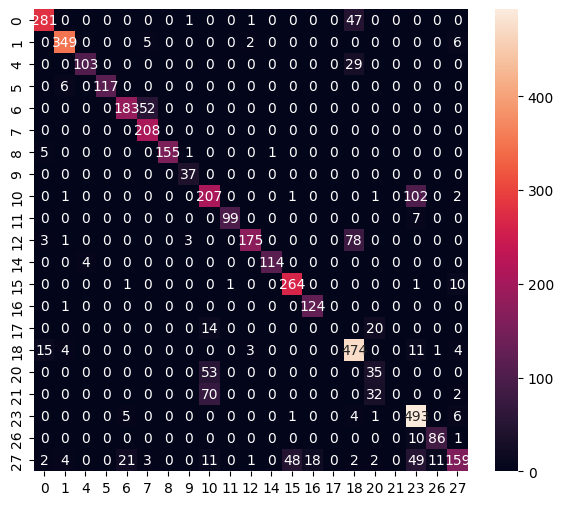

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       330
           1       0.95      0.96      0.96       362
           4       0.96      0.78      0.86       132
           5       1.00      0.95      0.97       123
           6       0.87      0.78      0.82       235
           7       0.78      1.00      0.87       208
           8       1.00      0.96      0.98       162
           9       0.88      1.00      0.94        37
          10       0.58      0.66      0.62       314
          11       0.99      0.93      0.96       106
          12       0.96      0.67      0.79       260
          14       0.99      0.97      0.98       118
          15       0.84      0.95      0.89       277
          16       0.87      0.99      0.93       125
          17       0.00      0.00      0.00        34
          18       0.75      0.93      0.83       512
          20       0.38      0.40      0.39        88
     

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpzcud4y5_\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpzcud4y5_\assets


Saved artifact at 'C:\Users\Admin\AppData\Local\Temp\tmpzcud4y5_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 28), dtype=tf.float32, name=None)
Captures:
  1700637251184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1700753088928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1700633418384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1700751721568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1700751922096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1700751529056: TensorSpec(shape=(), dtype=tf.resource, name=None)


7612

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.08 ms


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3320510e-04 1.7226860e-10 0.0000000e+00 0.0000000e+00 1.1484915e-21
 2.4092721e-13 3.7384232e-12 1.1142799e-17 8.7374261e-11 1.7130262e-18
 6.3474540e-13 9.6093736e-15 9.0138701e-06 0.0000000e+00 1.3142296e-18
 2.4295347e-02 9.1560060e-01 1.2714713e-23 1.6772181e-05 0.0000000e+00
 3.5543132e-18 1.3347663e-13 0.0000000e+00 1.4143905e-11 0.0000000e+00
 0.0000000e+00 4.0433095e-12 5.9945077e-02]
16
